In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import os
import cv2
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [21]:
#load dataset
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train_sub, y_train_sub) = (X_train[:100], y_train[:100])

print("Shape X_train_sub: ", X_train_sub.shape)
print("Shape y_train_sub: ", y_train_sub.shape)
print("Shape X_train: ", X_train.shape)
print("Shape y_train: ", y_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_test: ", y_test.shape)

Shape X_train_sub:  (100, 28, 28)
Shape y_train_sub:  (100,)
Shape X_train:  (60000, 28, 28)
Shape y_train:  (60000,)
Shape X_test:  (10000, 28, 28)
Shape y_test:  (10000,)


In [18]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_train_sub = tf.keras.utils.normalize(X_train_sub, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

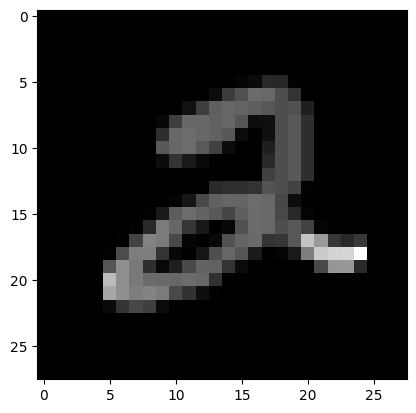

In [4]:
plt.imshow(X_train[5], cmap='gray')

In [19]:
#build model CNN in sub data

modelWeak = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')        
    ]
)
modelWeak.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelWeak.fit(X_train_sub.reshape(-1, 28, 28, 1), y_train_sub, epochs=10)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2180 - loss: 2.1714
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5160 - loss: 1.5643
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7120 - loss: 0.9872
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7840 - loss: 0.7164
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8180 - loss: 0.5650
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8560 - loss: 0.5015
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8800 - loss: 0.4083
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8940 - loss: 0.3680
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8820 - loss: 0.3420
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9360 - loss: 0.2429


In [6]:
#build model CNN

model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')        
    ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9264 - loss: 0.2429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9725 - loss: 0.0919
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9807 - loss: 0.0652
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9838 - loss: 0.0533
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9872 - loss: 0.0452
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9886 - loss: 0.0356
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9898 - loss: 0.0322
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9910 - loss: 0.0280
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9919 - loss: 0.0245
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9932 - loss: 0.0213


In [20]:
modelWeak.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8798 - loss: 0.3727


[0.3727360665798187, 0.879800021648407]

In [8]:
model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9917 - loss: 0.0348


[0.03484373912215233, 0.9916999936103821]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
So nay co kha nang la:  7


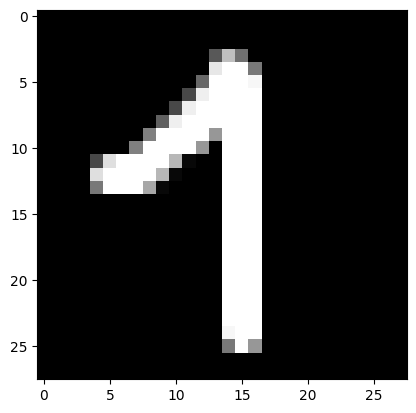

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
So nay co kha nang la:  2


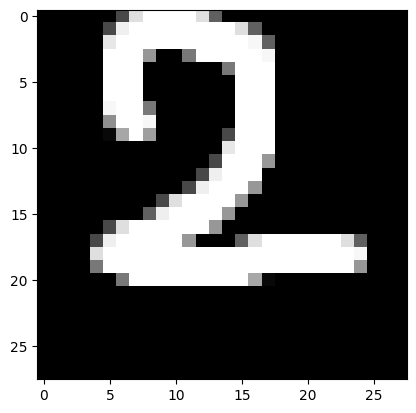

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
So nay co kha nang la:  3


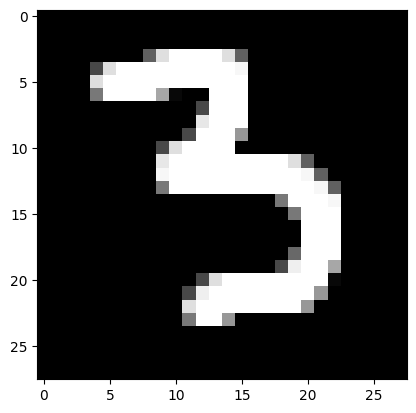

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
So nay co kha nang la:  4


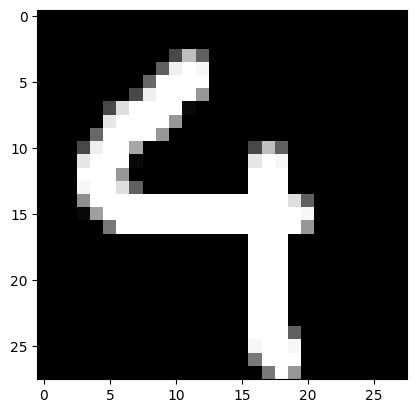

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
So nay co kha nang la:  3


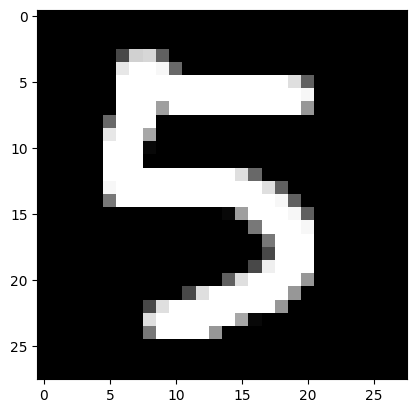

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
So nay co kha nang la:  6


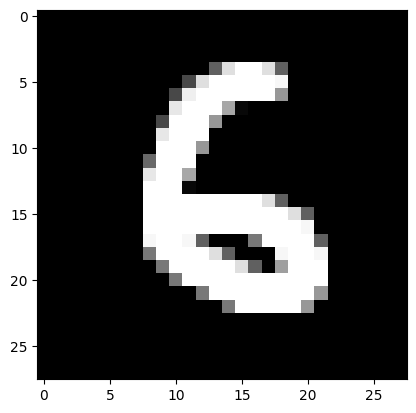

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
So nay co kha nang la:  3


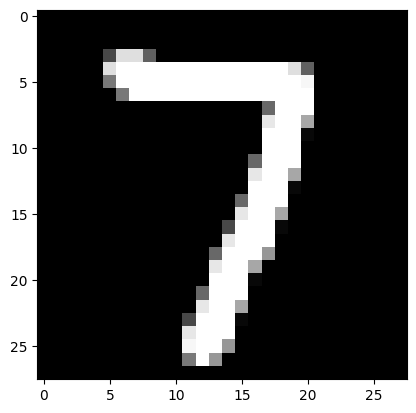

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
So nay co kha nang la:  3


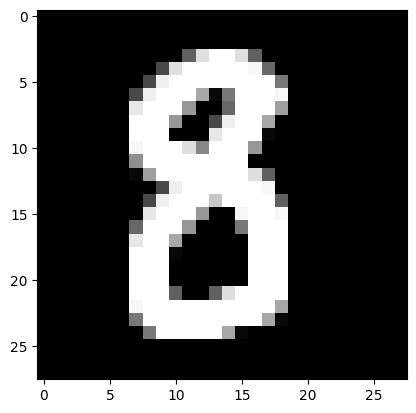

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
So nay co kha nang la:  3


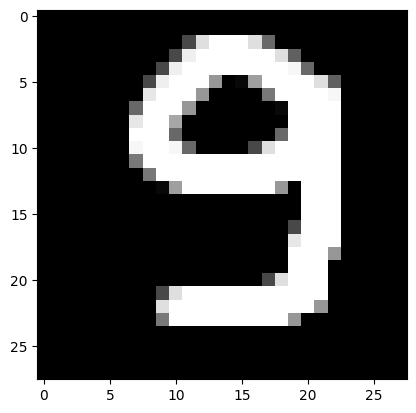

In [16]:
# Test on my data with weak model
index = 1
while os.path.exists(f'test/{index}.png'):
    img = cv2.imread(f'test/{index}.png', cv2.IMREAD_GRAYSCALE)
    img = np.invert(np.array(img))
    img = img.reshape(1, 28, 28, 1)
    y_pred = modelWeak.predict(img)
    print('So nay co kha nang la: ', np.argmax(y_pred))
    plt.imshow(img.squeeze(), cmap='gray')
    plt.show()
    index += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
So nay co kha nang la:  1


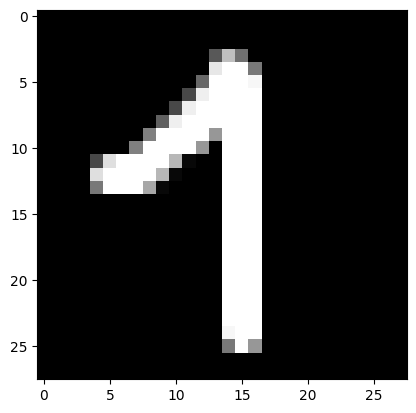

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
So nay co kha nang la:  2


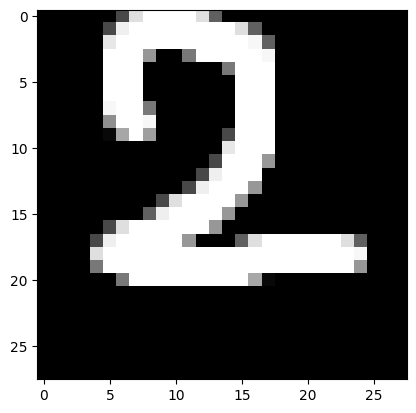

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
So nay co kha nang la:  3


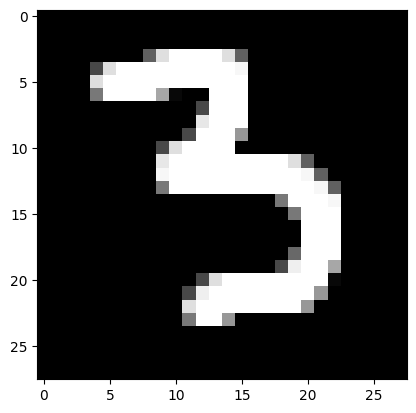

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
So nay co kha nang la:  4


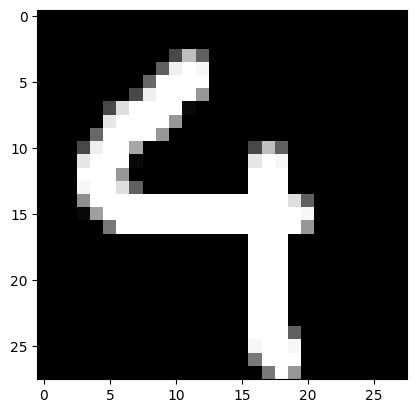

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
So nay co kha nang la:  5


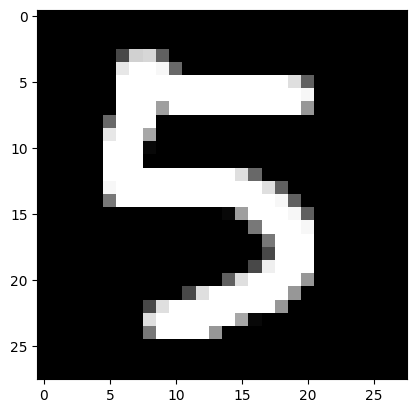

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
So nay co kha nang la:  6


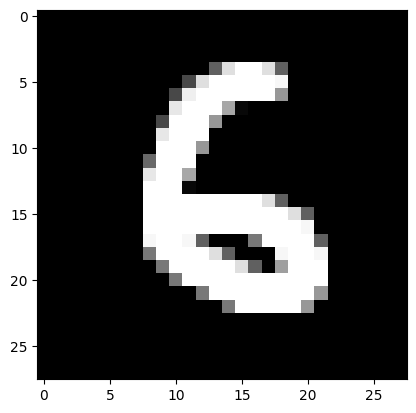

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
So nay co kha nang la:  2


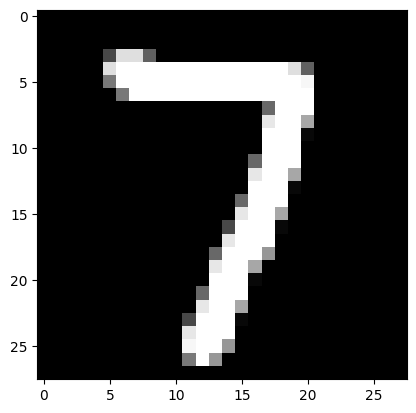

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
So nay co kha nang la:  8


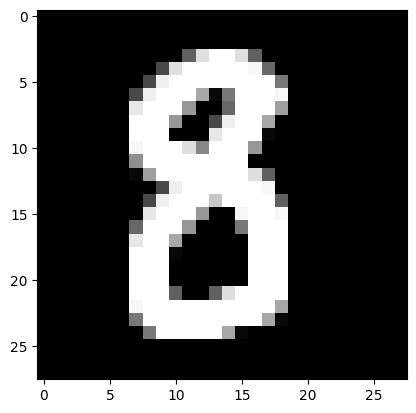

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
So nay co kha nang la:  8


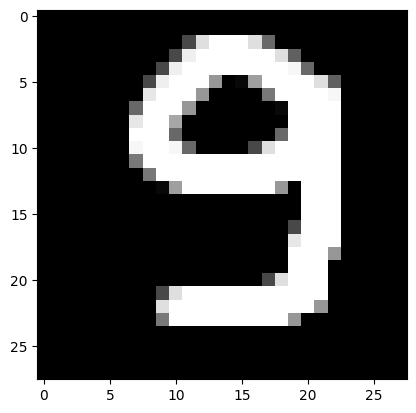

In [10]:
# Test on my data
index = 1
while os.path.exists(f'test/{index}.png'):
    img = cv2.imread(f'test/{index}.png', cv2.IMREAD_GRAYSCALE)
    img = np.invert(np.array(img))
    img = img.reshape(1, 28, 28, 1)
    y_pred = model.predict(img)
    print('So nay co kha nang la: ', np.argmax(y_pred))
    plt.imshow(img.squeeze(), cmap='gray')
    plt.show()
    index += 1